In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [3]:
!git clone https://github.com/ruthwik081/Data_googlecolab.git

fatal: destination path 'Data_googlecolab' already exists and is not an empty directory.


Now we will be loading the data for preprocessing

In [4]:
! ls

Data_googlecolab  sample_data


In [21]:
train = pd.read_csv('Data_googlecolab/MovieGenre.csv')
train = train.dropna()    # reading the csv file for metadata
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Data_googlecolab/MoviePosters/'+train['Poster'][i],target_size=(140,130,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 8030/8030 [00:08<00:00, 941.64it/s]


In [6]:
train.shape

(8030, 18)

We remove the columns Id and Genre to get an output variable 'y', which contains the labels that we train our model on

In [0]:
classes = train.columns[~train.columns.isin(['imdbId','Poster', 'Genre'])]
y = np.array(train.drop(['imdbId','Poster', 'Genre'],axis=1))

Now we randomly split training data into 90% train 10% validation data to see how our model performs on unknown data.After splitting the data I am deleting the original variable to save space.

In [0]:
del train_image
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
del X

Now we define our model. This is not training, here just define how many layers we need, how many hidden neurons and other hyper parameters.This is basically our architecture to construct the model which we will fit on our data.

In [0]:
model = Sequential() #this is a type of architecture used to build a model
# these are all preprocessing steps done by the model
model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(5,5), activation="relu"))
model.add(Dropout(0.5))
model.add(Flatten())
# here we are defining training parameters, dropout is employed to prevent overfitting of the model to the trainig data
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='sigmoid'))
#model.summary()

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

now we will be training our model and also pass the validation_data so that the model doesn't overfit

In [12]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2)
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=64,callbacks = [es])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7227 samples, validate on 803 samples
Epoch 1/100





7227/7227 [==============================] - 12s 2ms/step - loss: 0.5284 - acc: 0.7721 - val_loss: 0.4478 - val_acc: 0.8325
Epoch 2/100
7227/7227 [==============================] - 9s 1ms/step - loss: 0.4664 - acc: 0.8239 - val_loss: 0.4321 - val_acc: 0.8325
Epoch 3/100
7227/7227 [==============================] - 9s 1ms/step - loss: 0.4511 - acc: 0.8299 - val_loss: 0.4247 - val_acc: 0.8325
Epoch 4/100
7227/7227 [==============================] - 9s 1ms/step - loss: 0.4431 - acc: 0.8312 - val_loss: 0.4179 - val_acc: 0.8325
Epoch 5/100
7227/7227 [==============================] - 9s 1ms/step - loss: 0.4371 - acc: 0.8311 - val_loss: 0.4136 - val_acc: 0.8320
Epoch 6/100
7227/7227 [==============================] 

In [0]:
model_ok1_json = model.to_json()
with open("model_ok1.json", "w") as json_file:
    json_file.write(model_ok1_json)
# serialize weights to HDF5
model.save_weights("model_ok1.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
json_file = open('model_good.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_good.h5")
print("Loaded model from disk")

Comedy (0.405)
Drama (0.309)
Action (0.265)
Romance (0.24)


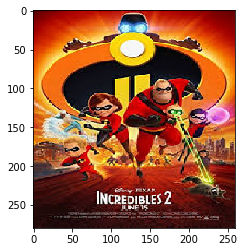

In [18]:
img = image.image.load_img('Fantastic4.jpg',target_size=(140,130,3))
img = image.img_to_array(img)
img = img/255

proba = model.predict(img.reshape(1,140,130,3))
top = np.argsort(proba[0])
dict = {}
for i in range(len(classes)):
    if i<4:
        dict.update({classes[top[-i-1]]:proba[0][top[-i-1]]})
        print("{}".format(classes[top[-i-1]])+" ({:.3})".format(proba[0][top[-i-1]]))
    elif (proba[0][top[-i-1]]/np.max(proba) > 0.82):
        print("{}".format(classes[top[-i-1]])+" ({:.3})".format(proba[0][top[-i-1]]))
plt.imshow(img)

In [17]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Fantastic4.jpg to Fantastic4.jpg
User uploaded file "Fantastic4.jpg" with length 17590 bytes


In [16]:
!ls

Data_googlecolab  sample_data


In [0]:
from google.colab import files

files.download('model_ok1.json')